In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import pandas as pd
import imageio
import glob
import shutil
from torch.utils.data import Dataset, DataLoader
from skimage.io import imread
from albumentations.pytorch import ToTensorV2
import albumentations as A

In [2]:
path= '/home/rishabh/Data/animal10/animal10_cls/train'
animals = os.listdir(path)
animals.sort()
print(animals)


['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


### Data Preprocessing

In [30]:
# for i in animals:
#     os.mkdir('/home/rishabh/Data/animal10/resized_raw_images/test/'+i)


In [4]:
train_path = '/home/rishabh/Data/animal10/animal10_cls/val'
dest_path = '/home/rishabh/Data/animal10/animal_10_small_cls/val'
for name in animals:
    print(name)
    files = glob.glob(train_path+'/'+name+'/*')
        
   #test_files = files[-215:]
    for vf in val_files:
        shutil.copy(vf, dest_path+'/'+name)
  #for tf in test_files:
   # shutil.copy(tf, dest_path+'test/'+name)

cane
cavallo
elefante
farfalla
gallina
gatto
mucca
pecora
ragno
scoiattolo


In [7]:
#for i in animals:
 #   os.mkdir('/home/rishabh/Data/animal10/animal_10_small_cls/discarded_train/'+i)


In [4]:
path= '/home/rishabh/Data/animal10/animal_10_small_cls/train/'
#for i in animals:
    print(i)
    imgs = glob.glob(path+i+'/*')[:500]
    n = len(imgs)
    for img in imgs:
        shutil.copy(img,'/home/rishabh/Data/animal10/animal10_cls/train/'+i)

cane
cavallo
elefante
farfalla
gallina
gatto
mucca
pecora
ragno
scoiattolo


In [5]:
os.remove('/home/rishabh/0.png')

In [1]:
a = [1,2,3]
for i in range(2):

    b = (4,5,6)
    a.extend(b)
print(a)

[1, 2, 3, 4, 5, 6, 4, 5, 6]


In [ ]:
img = glob.glob('/home/rishabh/Data/animal10/raw-img/'+animals[0]+'/*')
print(len(img), img[0])

In [ ]:
for i in animals:
    print(i)
    imgs = glob.glob(path+i+'/*')
    n = len(imgs)
    for idx,img in enumerate(imgs):
        if idx<= int(0.70*n)+1:
            shutil.copy(img,'/home/rishabh/Data/animal10/train/'+i)
        else:
            shutil.copy(img, '/home/rishabh/Data/animal10/val/'+i)

### Inference_ animal 10

In [4]:
# import glob
# #data_dir = '/home/rishabh/Downloads/test'
# files = glob.glob('/home/rishabh/Data/animal10/animal_10_small_cls/test/*/*')
# print(len(files))

2150


In [3]:
path= '/home/rishabh/Data/animal10/animal10_cls/train'
subjects = os.listdir(path)
subjects.sort()
print(subjects)

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [4]:
data_dir = '/home/rishabh/Data/animal10/animal_10_small_cls/'
imgpath_test = []
length_test = []
for sub in subjects:
    file1 = glob.glob(data_dir+'test/'+sub+'/*')
    length_test.append(len(file1))
    imgpath_test.extend(file1)

In [11]:
print(length_test)

[215, 215, 215, 215, 215, 215, 215, 215, 215, 215]


In [37]:
rgbd_det = []
for idx,ipath in enumerate(imgpath_test):
    img = imageio.imread(ipath)
    rgbd_det.append(img.shape[2])
    #print(img.shape)

In [40]:
list_idx = rgbd_det.index(4)
res_list = [i for i, value in enumerate(rgbd_det) if value == 4]
print(len(res_list))
print(res_list)


23
[475, 516, 531, 588, 590, 656, 688, 692, 703, 710, 723, 726, 754, 773, 797, 799, 803, 804, 826, 828, 843, 857, 1728]


(250, 320, 4)


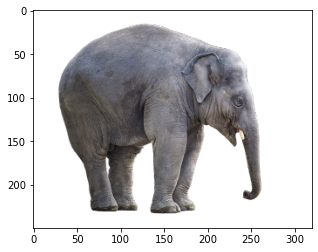

In [41]:
img_RGBD = imageio.imread(imgpath_test[475]) 
print(img_RGBD.shape)
plt.imshow(img_RGBD)
plt.show()



(250, 320, 3)


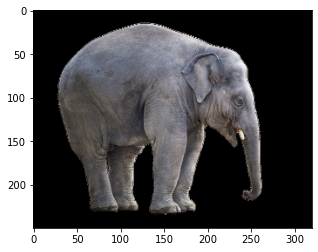

In [42]:
img_RGB = img_RGBD[:,:,:3]
print(img_RGB.shape)
plt.imshow(img_RGB)
plt.show()

In [12]:
a = np.zeros(215)
b = np.ones(215)
c = np.ones(215)*2
d = np.ones(215)*3
e = np.ones(215)*4
f = np.ones(215)*5
g = np.ones(215)*6
h = np.ones(215)*7
i = np.ones(215)*8
j = np.ones(215)*9
labels_test = np.concatenate((a,b,c,d,e,f,g,h,i,j), axis= 0)



In [13]:
print(np.array(imgpath_test).shape)

(2150,)


In [14]:
import random
random.seed(42)
class ds(Dataset):
    def __init__(self, imgpath, labels, transform = None):
        self.imgpath = imgpath
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.imgpath)
    
    def __getitem__(self,idx):
        path = self.imgpath[idx]
        image = imread(path)
        label = self.labels[idx]
        # print('Shape: ', image.shape)
        #image = image/255.0
        # print(image.min(), image.max())
        #image = img.transpose((2,0,1))
        # sample = {'images': image,'labels':label }
        if image.shape[2]==4:
            image = image[:,:,:3]
        if self.transform is not None:
            image = self.transform(image=image)["image"]
        #
        
       # print(image.dtype)
#         if self.transform:
#             img = torch.from_numpy(img)
#             sample = {'images':self.transform(img),'labels':label}  
        return image,label,path

In [44]:
data_transforms =  A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, brightness_by_max=True, always_apply=False, p=0.5),
    A.Resize(height= 250, width = 320),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
    ])

test_dataset = ds(imgpath=imgpath_test, labels = labels_test, transform= data_transforms)

In [45]:
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=True, num_workers=4)             
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
data_dir = '/home/rishabh/Data/animal10/animal_10_small_cls/test'
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = datasets.ImageFolder(data_dir,
                                          data_transforms['test'])
                  
dataloader = torch.utils.data.DataLoader(image_datasets, batch_size=1,
                                             shuffle=True, num_workers=4)
              

In [5]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 10)


/home/rishabh/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rishabh/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
PATH = '/home/rishabh/Downloads/25epoch_model_5k.pt'
model_ft.load_state_dict(torch.load(PATH, map_location= torch.device('cpu')))
model_ft.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# count = 0
# for (img, label, path) in dataloader:
#     count+=1
#     print(data)
#     label = label.tolist()[0]
#     print(label)
#     outputs = model_ft(img)
#     _, pred = torch.max(outputs, 1)
#     print(pred.tolist()[0])
#     if count==2:
#         break
    

In [ ]:
print(GT)

In [9]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [33]:
for d in next(iter(dataloader)):
    print(d.shape)
    break

torch.Size([1, 3, 224, 224])


In [10]:
a,b,c = next(iter(dataloader))
if a.shape[1]==3:
    a = a[:,:2,:,:]
print(a.shape)

torch.Size([1, 2, 224, 224])


In [8]:
inputs, classes = next(iter(dataloader))

for i in range(len(inputs.numpy())):
    print(inputs.numpy()[i].shape)

(3, 224, 224)


In [50]:
# with torch.no_grad():
#     for idx,d in enumerate(test_dataloader):
#         print(idx)
#         images, labels, path = d 
#         print([i.split('/')[-2] for i in path])
#         print(images.shape)
#         print(labels.shape)

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#for making changes to dataloader:  /site-packages/torchvision/datasets/folder.py
LABELS = []
PREDS = []
IMG_PATH = []
CONFIDENCE = []
with torch.no_grad():
    for d in dataloader:
        
        #try:
        images, labels, path = d   
        #print(path)
        if images.shape[1]==4:
            print('***',path)
            images = images[:,:3,:,:]
        images = images.to(device)
        labels = labels.to(device)

        label = labels.tolist()  #[0]
        outputs = model_ft(images)
        logit, pred = torch.max(outputs, 1)
        pred = pred.tolist() #[0]
        logit = logit.tolist()
        prob = [round(sigmoid(i),3) for i in logit]

        #if pred!= label:
        LABELS.extend(label)
        PREDS.extend(pred)
        IMG_PATH.extend(path)
        CONFIDENCE.extend(prob)
#         except:
#             pass


In [13]:
print(len(LABELS), len(PREDS))
print(len(CONFIDENCE), len(IMG_PATH))

2150 2150
2150 2150


In [15]:
98900/2150

46.0

In [12]:
#Img_Path = [i[0] for i in IMG_PATH]
entry = {'Label': LABELS, 'Predicted': PREDS, 'Confidence': CONFIDENCE} #,'Image Path': IMG_PATH
pred_df = pd.DataFrame(entry)  #wrong_
pred_df.to_csv('/home/rishabh/animal_10cls/model25_test_info_3channel.csv', index = False)

In [14]:
print(len(pred_df))
wrong_pred_df = pred_df[pred_df['Label']!= pred_df['Predicted']]
print(len(wrong_pred_df))

2150
103


In [15]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
print(classification_report(LABELS, PREDS))
#print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       215
           1       0.95      0.93      0.94       215
           2       0.99      0.95      0.97       215
           3       0.97      0.95      0.96       215
           4       0.99      0.96      0.97       215
           5       0.99      0.94      0.96       215
           6       0.91      0.95      0.93       215
           7       0.90      0.93      0.92       215
           8       0.97      0.98      0.97       215
           9       0.93      0.98      0.96       215

    accuracy                           0.95      2150
   macro avg       0.95      0.95      0.95      2150
weighted avg       0.95      0.95      0.95      2150



Text(0.5, 15.0, 'Predicted')

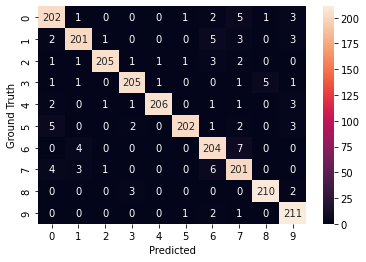

In [16]:
cm = confusion_matrix(LABELS, PREDS)
sns.heatmap(cm,annot=True,fmt="d")
plt.ylabel('Ground Truth')
plt.xlabel('Predicted')

In [61]:
wrong_pred_df

,Label,Predicted,Confidence,Image Path
5,7.0,6,1.000,/home/rishabh/Data/animal10/resized_raw_images...
7,6.0,7,1.000,/home/rishabh/Data/animal10/resized_raw_images...
32,0.0,5,0.998,/home/rishabh/Data/animal10/resized_raw_images...
41,7.0,6,1.000,/home/rishabh/Data/animal10/resized_raw_images...
58,6.0,7,0.992,/home/rishabh/Data/animal10/resized_raw_images...
...,...,...,...,...
2121,3.0,8,1.000,/home/rishabh/Data/animal10/resized_raw_images...
2125,0.0,1,1.000,/home/rishabh/Data/animal10/resized_raw_images...
2128,5.0,2,0.921,/home/rishabh/Data/animal10/resized_raw_images...
2130,1.0,0,0.997,/home/rishabh/Data/animal10/resized_raw_images...


In [60]:
for idx, path in enumerate(wrong_pred_df['Image Path'].tolist()):
    print(idx)
    label = int(wrong_pred_df.iloc[idx]['Label'])
    pred = int(wrong_pred_df.iloc[idx]['Predicted'])
    conf = round(wrong_pred_df.iloc[idx]['Confidence'],2)
    a = imageio.imread(path)
    plt.imsave('/home/rishabh/animal_10cls/25_albumentation_test_wrong_pred/{}_{}_{}_{}.png'.format(idx,label,pred,conf),a)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131


In [58]:
low_conf_df = pred_df[pred_df['Confidence']<0.80]
low_conf_df

,Label,Predicted,Confidence,Image Path
939,0.0,2,0.778,/home/rishabh/Data/animal10/resized_raw_images...
945,7.0,5,0.750,/home/rishabh/Data/animal10/resized_raw_images...


In [ ]:
img_1_6 = []
for index, row in wrong_pred_df.iterrows():
    if row["Label"]==1 and row["Predicted"]==6:
        img_1_6.append(row['Image Path'])
        

In [ ]:
for idx, path in enumerate(img_1_6):
    print(path)
    
    img = imageio.imread(path) 
    plt.imshow(img)
    plt.show()
    plt.imsave('/home/rishabh/animal_10cls/wrong_pred_1_6/{}.png'.format(idx),img)